# HW1 - Поспелова Алина

**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [338]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise_distances

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [339]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.train_data_x = X.astype(float)
        self.train_data_y = y.astype(int)
        self.classes_number = len(np.unique(y))
        if self.algorithm == 'kd_tree':
            self.train_tree = KDTree(X.astype(float))

    def _get_knn(self, X):
        if self.algorithm == 'brute':
            knn = np.argpartition(pairwise_distances(X, self.train_data_x),
                                  self.neighbors)[:, :self.neighbors]
        elif self.algorithm == 'kd_tree':
            knn = self.train_tree.query(X.astype(float), k=self.neighbors)[1]
        return knn;
        
    def predict(self, X):
        return np.apply_along_axis(lambda k: np.argmax(np.bincount(k)), 1,
                                   self.train_data_y[self._get_knn(X)].astype(int))

    def predict_proba(self, X):
        predictions = self.train_data_y[self._get_knn(X)].astype(int)
        return np.apply_along_axis(lambda k: np.bincount(k,
                                            minlength=self.classes_number) / self.neighbors,
                                   1, self.train_data_y[self._get_knn(X)].astype(int))

    def score(self, X, y):
        return (self.predict(X.astype(float)) == y.astype(int)).mean()

**IRIS**

In [340]:
iris = datasets.load_iris()

In [341]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [342]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [343]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [344]:
%time my_clf.fit(X_train, y_train)

Wall time: 1 ms


In [345]:
%time clf.predict(X_test)

Wall time: 2 ms


array([0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2])

In [296]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0], dtype=int64)

In [297]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [298]:
%time my_clf.predict_proba(X_test)

Wall time: 4 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [299]:
clf.score(X_test, y_test)

1.0

In [300]:
my_clf.score(X_test, y_test)

1.0

# Задание 3

Best score: 1.0; n_neighbors: 1


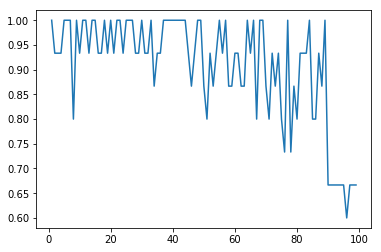

In [319]:
max_number = 100
score_result = []
best_score = 0
neighborg = 0
for k in range(1, max_number):
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, test_size = 0.1,
        stratify = iris.target)
    my_clf = MyKNeighborsClassifier(n_neighbors=k)
    my_clf.fit(X_train, y_train)
    score_result.append(my_clf.score(X_test, y_test))
    if score_result[-1] > best_score:
        neighborg = k
        best_score = score_result[-1]
print("Best score: {}; n_neighbors: {}".format(best_score, neighborg))
plt.plot(range(1, max_number), score_result)
plt.show()

**MNIST**

In [320]:
mnist = fetch_mldata('MNIST original')

In [321]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [322]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [323]:
%time clf.fit(X_train, y_train)

Wall time: 1min 38s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [324]:
%time my_clf.fit(X_train, y_train)

Wall time: 710 ms


In [325]:
%time clf.predict(X_test)

Wall time: 1min 59s


array([8., 0., 3., 0., 6., 6., 2., 6., 8., 5., 4., 1., 4., 9., 5., 8., 1.,
       1., 2., 1., 0., 3., 3., 5., 4., 4., 0., 5., 7., 5., 0., 9., 6., 4.,
       2., 3., 0., 1., 4., 5., 6., 3., 7., 3., 1., 0., 9., 6., 9., 3., 8.,
       8., 3., 4., 1., 6., 5., 5., 0., 4., 9., 3., 9., 8., 0., 6., 7., 5.,
       8., 3., 9., 7., 4., 6., 2., 1., 0., 7., 3., 0., 1., 3., 8., 1., 2.,
       7., 0., 4., 4., 7., 6., 0., 4., 8., 9., 9., 2., 4., 5., 5., 4., 7.,
       6., 9., 1., 7., 0., 8., 5., 1., 9., 1., 7., 6., 8., 4., 9., 1., 2.,
       2., 8., 2., 1., 8., 7., 8., 0., 6., 1., 3., 9., 2., 2., 3., 4., 5.,
       2., 3., 1., 9., 9., 3., 5., 9., 7., 8., 0., 2., 8., 4., 4., 1., 8.,
       9., 0., 7., 9., 7., 4., 6., 2., 2., 0., 9., 2., 2., 0., 7., 6., 2.,
       1., 9., 1., 1., 5., 4., 5., 7., 6., 9., 6., 9., 8., 8., 1., 9., 0.,
       1., 7., 8., 7., 9., 4., 0., 5., 6., 4., 4., 0., 2., 5., 4., 3., 1.,
       5., 3., 5., 9., 3., 0., 6., 5., 6., 4., 7., 5., 9., 2., 6., 3., 8.,
       1., 7., 0., 5., 5.

In [326]:
%time my_clf.predict(X_test)

Wall time: 7.55 s


array([8, 0, 3, 0, 6, 6, 2, 6, 8, 5, 4, 1, 4, 9, 5, 8, 1, 1, 2, 1, 0, 3,
       3, 5, 4, 4, 0, 5, 7, 5, 0, 9, 6, 4, 2, 3, 0, 1, 4, 5, 6, 3, 7, 3,
       1, 0, 9, 6, 9, 3, 8, 8, 3, 4, 1, 6, 5, 5, 0, 4, 9, 3, 9, 8, 0, 6,
       7, 5, 8, 3, 9, 7, 4, 6, 2, 1, 0, 7, 3, 0, 1, 3, 8, 1, 2, 7, 0, 4,
       4, 7, 6, 0, 4, 8, 9, 9, 2, 4, 5, 5, 4, 7, 6, 9, 1, 7, 0, 8, 5, 1,
       9, 1, 7, 6, 8, 4, 9, 1, 2, 2, 8, 2, 1, 8, 7, 8, 0, 6, 1, 3, 9, 2,
       2, 3, 4, 5, 2, 3, 1, 9, 9, 3, 5, 9, 7, 8, 0, 2, 8, 4, 4, 1, 8, 9,
       0, 7, 9, 7, 4, 6, 2, 2, 0, 9, 2, 2, 0, 7, 6, 2, 1, 9, 1, 1, 5, 4,
       5, 7, 6, 9, 6, 9, 8, 8, 1, 9, 0, 1, 7, 8, 7, 9, 4, 0, 5, 6, 4, 4,
       0, 2, 5, 4, 3, 1, 5, 3, 5, 9, 3, 0, 6, 5, 6, 4, 7, 5, 9, 2, 6, 3,
       8, 1, 7, 0, 5, 5, 5, 3, 7, 8, 5, 6, 5, 8, 7, 2, 3, 8, 5, 6, 0, 7,
       6, 3, 0, 0, 3, 1, 8, 5, 1, 0, 4, 2, 1, 5, 7, 0, 1, 6, 4, 5, 3, 0,
       1, 2, 3, 1, 4, 3, 1, 3, 0, 5, 3, 8, 3, 1, 7, 5, 8, 8, 7, 1, 8, 6,
       7, 9, 2, 6, 4, 1, 5, 8, 7, 4, 0, 9, 1, 2, 0,

In [327]:
%time clf.predict_proba(X_test)

Wall time: 2min 5s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [328]:
%time my_clf.predict_proba(X_test)

Wall time: 13.7 s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [329]:
clf.score(X_test, y_test)

0.9742857142857143

In [330]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 4

In [331]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [332]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [333]:
%time clf.fit(X_train, y_train)

Wall time: 1min 30s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [346]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [347]:
%time clf.predict(X_test)

Wall time: 2 ms


array([0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2])

In [348]:
%time my_clf.predict(X_test)

Wall time: 40 ms


array([0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2], dtype=int64)

In [349]:
%time clf.predict_proba(X_test)

Wall time: 2 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [350]:
%time my_clf.predict_proba(X_test)

Wall time: 3 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [351]:
clf.score(X_test, y_test)

1.0

In [352]:
my_clf.score(X_test, y_test)

1.0

Задание 5

In [353]:
# seaborn - это высокоуровневое API на базе библиотеки matplotlib,
#           содержащее настройки для оформления графиков,
#           а также сложные типы визуализации, которые в matplotlib
#           потребовали бы большого количество кода.
# matplotlib - библиотека для визуализации данных двумерной и
#              трёхмерной графики, поддерживающий многие виды графиков
#              и диаграмм, анимированные изображения
# train_test_split - функция из sklearn, разбивающая массивы или матрицы
#                    на тренировочную и тестовую выборки.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - цепочка
#                         преобразований с окончательной оценкой,
#                         на вход одной функции подаётся
#                         выход другой функции.
# StandardScaler (from sklearn.preprocessing import StandardScaler) - это
#                        класс, нормирующий данные, приводящий дисперсию
#                        к единице,а матожидание к 0
# ClassifierMixin - базовый класс для всех классификаторов в sklearn.
# NeighborsBase - базовый класс для всех предсказаний neighbors (KNN)
# KNeighborsMixin - базовый класс, для всех классов KNN, содержащих методы
#                   поиска ближайших соседей.
# SupervisedIntegerMixin - базовый класс для всех реализаций классификатора,
#                          содержащих метод fit